# Exercise 1 - Implementing the logistic function

**Task**:
Implement the logistic function

$$ \sigma(x) = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}$$

In [4]:
import numpy as np

#def sigma(x):
    # Put your definition here

Next, we want to investigate how the shape of the logistic function changes for an affine linear input, i.e.,

$$ \sigma(\beta_0 + \beta_1 x) $$

for different values of $\beta_0$ and $\beta_1$.

**Task**: Take your time and try different values.
What happens for negative/positive values of $\beta_1$?
What role does $\beta_0$ play?

**You have nothing to implement here, only evaluate the cells below.**

In [9]:
def my_sigma(b0, b1) : return sigma(b0 + b1 * x)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
def f(b0, b1):
    plt.figure(1)
    x = np.linspace(-10,10,1001)
    plt.plot(x, sigma(b0 + b1*x))
    plt.plot(x,0.5*np.ones(x.shape))
    plt.ylim(-0.1, 1.1)
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.show()

interactive_plot = interactive(f, b0=(-10.0, 10.0, 1.0), b1=(-3., 3., 0.2))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0, step=1.0), FloatSlider(val…

# Exercise 2 - Logistic regression in practice

In this lab, we want to investigate the `Default` data set known from the lecture.
We first load the necessary modules.
The command
    
    plt.rcParams['figure.figsize'] = [13, 5]
    
changes the size of the figure (in inches).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 5]

**Task**: Download the file `Default.csv` from the webpage and read it using the `pandas` function `read_csv`.

**Task**: Inspect the data using the methods you've learned so far, e.g., `describe`, `hist`, `head`, etc.

**Observation**: If you try the `describe` function you should see that the predictors `default` and `student` are not part of the summary.
This is due to the fact that these values were read in by the `read_csv` function as strings. We know from the lecture that these predictors are categorical (in particular binary).

In order to process these values we convert them to the data type `boolean`, i.e., we replace the `String` objects in the columns `default` and `student` by `Boolean`'s.
There are a lot of ways to accomplish this task; the easiest might be

    D.replace(to_replace='No',value=False,inplace=True)
    
**Task**: Replace every 'No' and 'Yes' in the `DataFrame` by the values `False` and `True`, resp.

Next, we want to plot both, the `income` and `balance` predictors as boxplots as a function of the `default` status.

**Task**: Complete the plotting command in the following cell. What do you observe?

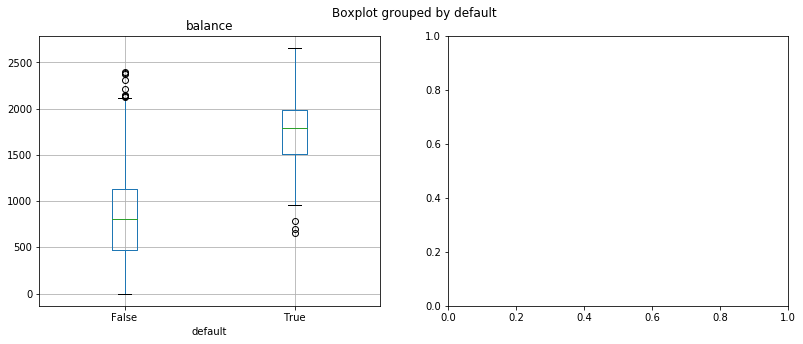

In [18]:
fig, ax = plt.subplots(1,2)
D.boxplot(column='balance',by='default', ax=ax[0]);

**Answer**:

Next, we want to fit a logistic regression model to our data.
Use the `LogisticRegression` function in the module `sklearn.linear_model`.
The behaviour is similar to a `LinearRegression` fit.

You can find the documentation of this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
There are a lot of optional arguments, the most important might be the unimpressive looking parameter `C`, which determines the strength of regularization used in the algorithm that solves the maximum likelihood problem.

We will discuss regularization later in the lecture as well as in the labs. For now, it suffices if you keep the following in mind:

**The larger you choose `C`, the less the problem will be regularized.**

**Task**: Fit a logistic regression model that predicts the probability of `default` using `balance` as predictor. You should obtain the following values: $\beta_0: -10.6513$, $\beta_\text{balance}: 0.0055$.

Choose the following optional parameters:
* set the regularization parameter `C = 1e10` (which is the scientific notation of $C = 10^{10}$, and thus very large)
* set the error tolerance to `tol=1e-10`
* set the solver to `solver = 'liblinear'`

in this and the upcoming problems.

**Task**: Print the intercept as well as the coefficients in a nice way.

**Task**:
Predict the probability of `default` for a `balance` value of $\$ 1.000 $ and $\$ 2.000 $, resp.
Use the method `predict_proba`.
Interpret the results.

Now, we want to incorporate the predictors `income` and `student` status as well. This can be done easily using the same methods.

In [23]:
lr2= LogisticRegression(solver='liblinear',tol=1e-10,C=1e10)
X = D.loc[:,['balance','income','student']]
y = D.loc[:,'default']
reg2 = lr2.fit(X,y)

**Task**: Print the intercept as well as the coefficients in a nice way.

**Task**:
What is the default probability of a student and a non-student with a credit card balance of $\$ 1500$, an income of $\$40,000$?

**Answer**: